In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from statistics import mean 

In [38]:
class Genetics():
    '''
    Genetic algorithm for solving the 8-queens query.
    
    Methods:
       
       generator :
                   creating the first generation
       cross_over(first_gen) : 
                   switching parts of parent chromosomes
       mutation(f_c_gen) : 
                   Mutate parts of chromosomes
       evaluation(total_gen) : 
                   calculating the cost of every chromosome and choosing the ones with least costs
       run : 
                   performing whole genetic algorithm multiple times to get to answers
    
    '''
    
    def __init__(self, population, num_loops, cross_over_rate, mutation_rate):
        '''
        initializing obj's attributes
        
        Attributes:
        
           population : number of chromes that form first generation
           num_loops : number of times that algorithm is performed
           cross_over_rate : number of chromes going to be cross overed per loop
           mutation_rate : number of chromes going to be mutated per loop
           
        '''
        self.population = population
        self.num_loops = num_loops
        self.cross_over_rate = cross_over_rate
        self.mutation_rate = mutation_rate
        
    def generator(self):
        '''
        creating the first generation
        
        Returns:
           first_gen(list) : a list of first generation chrome
           
        '''
        
        first_gen = []
        for _ in range(self.population):
            chrome = [random.randint(1, 8) for _ in range(8)]  
            first_gen.append(chrome)  

        return first_gen

    def cross_over(self, first_gen):
        '''
        switching parts of parent chromosomes
        
        Parameters:
           first_gen(list) : a list of first generation chrome
           
        Returns:
           cross_over_gen(list) : a list of cross overed chromes
        '''
        
        random.shuffle(first_gen)
        num_cross_over = int(self.cross_over_rate * len(first_gen))
        cross_over_gen = first_gen[:num_cross_over]
        
        for _ in range(int(num_cross_over/2)):
            cross_over_point = random.randint(0 , 7)
            newchrome1 = cross_over_gen[0][:cross_over_point] + cross_over_gen[1][cross_over_point:]
            newchrome2 = cross_over_gen[1][:cross_over_point] + cross_over_gen[0][cross_over_point:]
            
            # removing the parent chromes and appending child chromes
            cross_over_gen.append(newchrome1)
            cross_over_gen.append(newchrome2)
            cross_over_gen.remove(cross_over_gen[0])
            cross_over_gen.remove(cross_over_gen[0])

        return cross_over_gen

    def mutation(self, f_c_gen):
        '''
        assigning a random value to a random index(mutating)
        
        Parameters:
           f_c_gen(list) : a list of first and cross overed chromes
           
        Returns:
           mutation_gen(list) : a list of mutated chromes
        '''
        
        random.shuffle(f_c_gen)
        num_mutation = int(self.mutation_rate * len(f_c_gen))
        mutation_gen = f_c_gen[:num_mutation]
        
        for chrome in mutation_gen:
            # assigning a random value to a random point in a chrome
            mutation_point = random.randint(0 , 7)
            chrome[mutation_point] = random.randint(1, 8)

        return mutation_gen
    
    def cost(chrome):
            '''
            calculating the cost of a chrome
        
            Parameters:
               chrome(list) : a list of values showing the place of queens
           
            Returns:
               horizental_thread + diagonal_thread(int) : number of threads in a chrome 
               
            '''
            
            horizental_thread = 8 - len(set(chrome))
            
            diagonal_thread = 0
            # i & j : indices in a chrome
            # chrome[i] & chrome[j] : values of i & j
            for i in range(8):
                for j in range(i+1, 8):
                    if abs(i - j) == abs(chrome[i] - chrome[j]):
                        diagonal_thread += 1
            
            return horizental_thread + diagonal_thread
        

    def evaluation(self, total_gen):
        '''
        calculating the cost of every chromosome and choosing the ones with least costs
        
        Parameters:
           total_gen(list) : a list of first and cross overed and mutated chromes(all chromes)
           
        Returns:
           total_gen[:self.population] : a list of chormes with least costs
        '''

        total_gen.sort(key = Genetics.cost)
        return total_gen[:self.population]

    def run(self):
        '''
        performing whole genetic algorithm multiple times to get to answers
           
        Returns:
           first_gen(list) : a list of the last chosen generation that is going to be the first generation for the next loop
               
            '''
        mean_gen = []
        first_gen = self.generator()
        for _ in range(self.num_loops):
            cross_over_gen = self.cross_over(first_gen)
            mutation_gen = self.mutation(first_gen + cross_over_gen)
            total_gen = first_gen + cross_over_gen + mutation_gen
            first_gen = self.evaluation(total_gen)
            
            cost_gen = [Genetics.cost(chrome) for chrome in first_gen]
            mean_gen.append(mean(cost_gen))
            
        return first_gen , mean_gen
    
    

In [43]:
# ____________________________________________________ PROGRAM _________________________________________________________________


# population, num_loops, cross_over_rate, mutation_rate
test_obj = Genetics(10, 180, 0.8, 0.3)
final_gen , mean_gen = test_obj.run()

print('final_gen:')
for chrome in final_gen:
    print('')
    print(chrome)
    

final_gen:



[3, 5, 2, 8, 1, 7, 4, 6]



[3, 5, 2, 8, 1, 7, 4, 6]



[3, 5, 2, 8, 1, 7, 4, 6]



[3, 5, 2, 8, 1, 7, 4, 6]



[3, 5, 2, 8, 1, 7, 4, 6]



[3, 5, 2, 8, 1, 7, 4, 6]



[3, 5, 2, 8, 1, 7, 4, 6]



[3, 5, 2, 8, 1, 7, 4, 6]



[3, 5, 2, 8, 1, 7, 4, 6]



[3, 5, 2, 8, 1, 7, 4, 6]


In [44]:
# real unique answers

def find_uniques(final_gen):
    unique_answers = []
    for chrome in final_gen:
        unique_answers.append(chrome)
        final_gen.remove(chrome)
        while chrome in final_gen:
            final_gen.remove(chrome)
        
    return unique_answers

unique_answers = find_uniques(final_gen)
print(unique_answers)

[[3, 5, 2, 8, 1, 7, 4, 6]]


In [45]:
# checking costs of final_gen

print('costs: ')
for chrome in unique_answers:
    print(Genetics.cost(chrome))
    
# delete later

costs: 

0


In [46]:
# finding more answers

total_answers = list()
while len(total_answers) < 5:
    test_obj = Genetics(10, 180, 0.8, 0.3)
    final_gen , mean_gen = test_obj.run()
    unique_answers = find_uniques(final_gen)
    for chrome in unique_answers:
        if Genetics.cost(chrome) == 0:
            total_answers.append(unique_answers)
    
print(total_answers)

[[[2, 7, 3, 6, 8, 5, 1, 4]], [[4, 6, 8, 2, 7, 1, 3, 5]], [[6, 1, 5, 2, 8, 3, 7, 4]], [[3, 7, 2, 8, 5, 1, 4, 6]], [[5, 7, 1, 3, 8, 6, 4, 2]]]


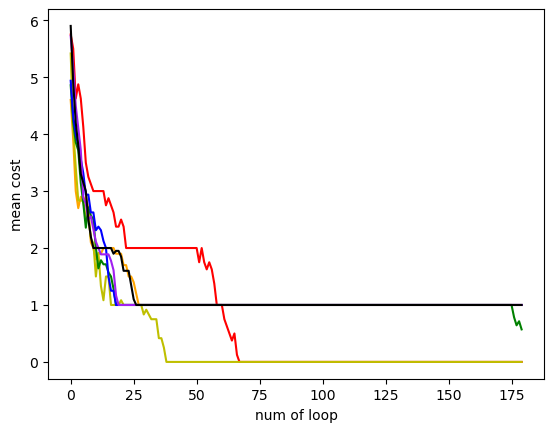

In [52]:
# checking population

population = [8, 10, 12, 14, 16, 18, 20]
colors =  ['r', '#FFA500', 'y', 'g', 'b', '#A020F0', 'k']

for p in zip(population, colors):
    test_obj = Genetics(p[0], 180, 0.8, 0.3)
    final_gen, mean_gen = test_obj.run()
    
    y_axis = mean_gen
    x_axis = list(range(len(y_axis)))
    plt.xlabel('num of loop')
    plt.ylabel('mean cost')
    plt.plot(x_axis, y_axis, color = p[1])
    


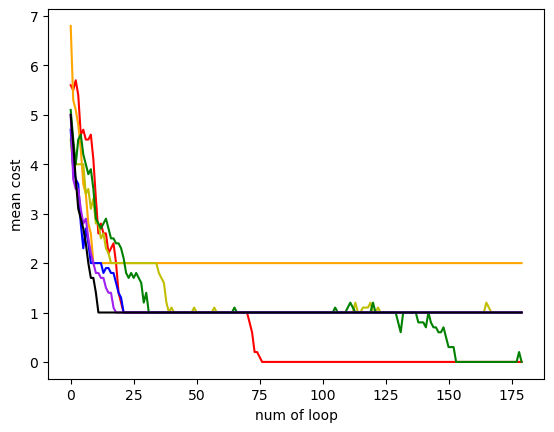

In [50]:
# checking cross over rate

cross_over_rate = [0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90]
colors =  ['r', '#FFA500', 'y', 'g', 'b', '#A020F0', 'k']

for c in zip(cross_over_rate, colors):
    test_obj = Genetics(10, 180, c[0], 0.3)
    final_gen, mean_gen = test_obj.run()
    
    y_axis = mean_gen
    plt.xlabel('num of loop')
    plt.ylabel('mean cost')
    plt.plot(x_axis, y_axis, color = c[1])
    


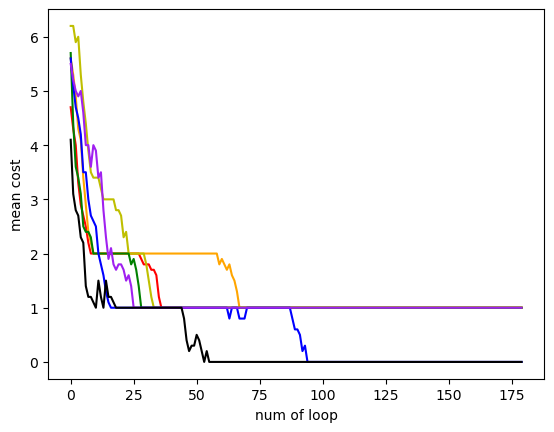

In [51]:
# checking mutation rate

mutation_rate = [0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45]
colors =  ['r', '#FFA500', 'y', 'g', 'b', '#A020F0', 'k']

for m in zip(mutation_rate, colors):
    test_obj = Genetics(10, 180, 0.8, m[0])
    final_gen, mean_gen = test_obj.run()
    
    y_axis = mean_gen
    plt.xlabel('num of loop')
    plt.ylabel('mean cost')
    plt.plot(x_axis, y_axis, color = m[1])
    
